# Part 1: Let's get started
## Importing some libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Some useful helper functions

In [2]:
def visualize_digit(img):
    """
    Display the vector as a 28*28 grayscale image.
    """
    img = img.reshape((28,28))
    plt.imshow(img, cmap="gray")
    plt.show()

In [3]:
def vectoried_generate_onehot_vector(labels):
    """
    Returns the onehot encoding of the labels. This is a vectorized version of the function.
    """
    onehot = np.zeros((len(labels), 10))
    onehot[np.arange(len(labels)), labels] = 1
    return onehot

In [4]:
def generate_onehot_vector(labels):
    """
    Returns the onehot encoding of the labels.
    """
    num_samples = len(labels)
    onehot = np.zeros((num_samples, 10))
    for i in range(num_samples):
        label = labels[i]
        onehot[i, label] = 1
    return onehot

## Loading training set and testing set
The dataset we are working with in this tutorial is the MNIST handwritten digit dataset.
There are 60000 training examples and 10000 testing examples. We will only use 20000 of the trainig examples and 2000 of the testing examples.

In [6]:
X_train = np.load("X_train.npy")[:20000,:]
y_train = np.load("y_train.npy")[:20000]
X_test = np.load("X_test.npy")[:2000,:]
y_test = np.load("y_test.npy")[:2000]

Visualize the first trainig sample

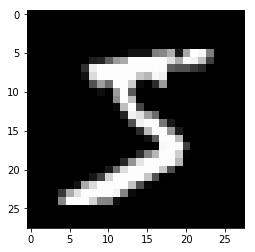

In [7]:
visualize_digit(X_train[0])

Using [sklearn.preprocessing.StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) to normalize the data.
Try what would happen if you don't normalize the data.

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

c:\users\qin\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## Change the labels to one hot vector

In [10]:
y_train_onehot = generate_onehot_vector(y_train)
y_test_onehot = vectoried_generate_onehot_vector(y_test)

# Part 2: Setting up the neural network

In this tutorial, we will use a neural network with three fully connected hidden layers. We will explore how different hyperparamter choices affect the performance of our neural network. Let's first set up some hyperparameters for our net.

In [11]:
learning_rate = 0.1
iterations = 1000
layer_1_nodes = 150
layer_2_nodes = 150
layer_3_nodes = 150
layer_4_nodes = 10

## Setting up neural network
tf.placeholder is a variable to which we will assign values to at the later stage.

In [12]:
X = tf.placeholder(tf.float32, shape=[None, 784])
Y = tf.placeholder(tf.float32, shape=[None, 10])

Let's add the layers of our neural net to our ["Computational Graph"]([https://www.tensorflow.org/programmers_guide/graphs)

In [13]:
w1 = tf.Variable(tf.random_normal(shape=[784, layer_1_nodes], 
                                           dtype=tf.float32,
                                           stddev=1e-1),
                                           name="weights1")
b1 = tf.Variable(tf.constant(0.0, shape=[layer_1_nodes], dtype=tf.float32), name="biases1")

layer_1_output = tf.nn.relu(tf.matmul(X, w1) + b1)


w2 = tf.Variable(tf.random_normal(shape=[layer_1_nodes, layer_2_nodes], 
                                           dtype=tf.float32,
                                           stddev=1e-1),
                                           name="weights2")
b2 = tf.Variable(tf.constant(0.0, shape=[layer_2_nodes], dtype=tf.float32), name="biases2")

layer_2_output = tf.nn.relu(tf.matmul(layer_1_output, w2) + b2)


w3 = tf.Variable(tf.random_normal(shape=[layer_2_nodes, layer_3_nodes], 
                                           dtype=tf.float32,
                                           stddev=1e-1),
                                           name="weights3")
b3 = tf.Variable(tf.constant(0.0, shape=[layer_3_nodes], dtype=tf.float32), name="biases3")

layer_3_output = tf.nn.relu(tf.matmul(layer_2_output, w3) + b3)

w4 = tf.Variable(tf.random_normal(shape=[layer_3_nodes, layer_4_nodes], 
                                           dtype=tf.float32,
                                           stddev=1e-1),
                                           name="weights4")
b4 = tf.Variable(tf.constant(0.0, shape=[layer_4_nodes], dtype=tf.float32), name="biases4")

layer_4_output = tf.matmul(layer_3_output, w4) + b4


## Choices of loss function

In [14]:
prediction = layer_4_output
cost = tf.losses.softmax_cross_entropy(logits=prediction, onehot_labels=Y)
# cost = tf.reduce_mean(tf.squared_difference(prediction, Y))

In [15]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

## Trainig phrase

In [16]:
# saver = tf.train.Saver() # for part3

session = tf.InteractiveSession()
    
session.run(tf.global_variables_initializer())
    
for i in range(iterations):
    session.run(optimizer, feed_dict={X: X_train, Y: y_train_onehot})
        
    if i % 20 == 0:
        training_cost = session.run(cost, feed_dict={X: X_train, Y:y_train_onehot})
        current_prediction = session.run(prediction, feed_dict={X: X_train, Y:y_train_onehot})
        current_prediction = np.argmax(current_prediction, axis=1)
        accuracy = sum(current_prediction==y_train) / len(y_train)
        print("At iteration {}, the accuracy and cost are:".format(i))
        print("The accuracy on the training set is", accuracy)
        print("The current training cost: {}\n".format(training_cost))
            
# Training is now complete!
print("Training is complete!")

final_training_cost = session.run(cost, feed_dict={X: X_train, Y:y_train_onehot})
final_testing_cost = session.run(cost, feed_dict={X: X_test, Y: y_test_onehot})

print("Final Training cost: {}".format(final_training_cost))
print("Final Testing cost: {}".format(final_testing_cost))
# saver.save(session, "./tmp/model.ckpt")
    

At iteration 0, the accuracy and cost are:
The accuracy on the training set is 0.16765
The current training cost: 2.7198617458343506

At iteration 20, the accuracy and cost are:
The accuracy on the training set is 0.7591
The current training cost: 0.7878494262695312

At iteration 40, the accuracy and cost are:
The accuracy on the training set is 0.8507
The current training cost: 0.5017147064208984

At iteration 60, the accuracy and cost are:
The accuracy on the training set is 0.88435
The current training cost: 0.39759373664855957

At iteration 80, the accuracy and cost are:
The accuracy on the training set is 0.9013
The current training cost: 0.334685742855072

At iteration 100, the accuracy and cost are:
The accuracy on the training set is 0.91465
The current training cost: 0.2925950884819031

At iteration 120, the accuracy and cost are:
The accuracy on the training set is 0.92365
The current training cost: 0.26139533519744873

At iteration 140, the accuracy and cost are:
The accurac

In [17]:
current_prediction = session.run(prediction, feed_dict={X: X_test, Y:y_test_onehot})
current_prediction = np.argmax(current_prediction, axis=1)
accuracy = sum(current_prediction==y_test) / len(y_test)
print("The testing accuracy is {}".format(accuracy))

The testing accuracy is 0.9245


# (Extra)Part 3: Save 
https://www.tensorflow.org/guide/saved_model

In [ ]:
saver = tf.train.Saver()

with tf.Session() as session:
    saver.restore(session, "./tmp/model.ckpt")
    current_prediction = session.run(prediction, feed_dict={X: X_test, Y:y_test_onehot})
    current_prediction = np.argmax(current_prediction, axis=1)
    accuracy = sum(current_prediction==y_test) / len(y_test)
    print(accuracy)

In [ ]:
saver = tf.train.Saver()

session = tf.InteractiveSession()
saver.restore(session, "./tmp/model.ckpt")
current_prediction = session.run(prediction, feed_dict={X: X_test, Y:y_test_onehot})
current_prediction = np.argmax(current_prediction, axis=1)
accuracy = sum(current_prediction==y_test) / len(y_test)
print(accuracy)

## More resources:
https://www.tensorflow.org/
https://pythonprogramming.net/machine-learning-tutorial-python-introduction/
https://learningtensorflow.com/

# Thanks for coming!